In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr

#factor = pdr.data.DataReader('F-F_Research_Data_Factors', 'famafrench',start='1-1-1926')[0]

page = pd.read_html("https://en.wikipedia.org/wiki/DAX")
tickers = page[3].iloc[:,3]

dax = pd.DataFrame()
df_mcap = pd.DataFrame()

for i in tickers:
    display(i)
     
    data= yf.download(i,interval="1d",start="2020-01-01",end="2021-11-30")
    
    data= pd.DataFrame(data["Adj Close"])
    data.columns= [i]
    dax= pd.concat([dax,data],axis=1)
    
    
    stk= yf.Ticker(i)
    try:
        stk.info["floatShares"]
    except:
        stk.info["floatShares"]= None
    try:
        stk.info["sharesOutStanding"]
    except:   
        stk.info["sharesOutStanding"] = None
    if stk.info["floatShares"]:
        mcap = data * stk.info["floatShares"]
    elif stk.info["sharesOutStanding"]:
        mcap = data * stk.info["sharesOutStanding"]
    else:
        mcap = data * (stk.info["marketCap"]/stk.info["previousClose"])
        
    df_mcap = pd.concat([df_mcap,mcap],axis=1)    
    
    
dax.drop("ENR.DE",axis=1,inplace=True)    

'ADS.DE'

[*********************100%***********************]  1 of 1 completed


'ALV.DE'

[*********************100%***********************]  1 of 1 completed


'BAS.DE'

[*********************100%***********************]  1 of 1 completed


'BAYN.DE'

[*********************100%***********************]  1 of 1 completed


'BMW.DE'

[*********************100%***********************]  1 of 1 completed


'CON.DE'

[*********************100%***********************]  1 of 1 completed


'1COV.DE'

[*********************100%***********************]  1 of 1 completed


'DAI.DE'

[*********************100%***********************]  1 of 1 completed


'DHER.DE'

[*********************100%***********************]  1 of 1 completed


'DBK.DE'

[*********************100%***********************]  1 of 1 completed


'DB1.DE'

[*********************100%***********************]  1 of 1 completed


'DPW.DE'

[*********************100%***********************]  1 of 1 completed


'DTE.DE'

[*********************100%***********************]  1 of 1 completed


'DWNI.DE'

[*********************100%***********************]  1 of 1 completed


'EOAN.DE'

[*********************100%***********************]  1 of 1 completed


'FRE.DE'

[*********************100%***********************]  1 of 1 completed


'FME.DE'

[*********************100%***********************]  1 of 1 completed


'HEI.DE'

[*********************100%***********************]  1 of 1 completed


'HEN3.DE'

[*********************100%***********************]  1 of 1 completed


'IFX.DE'

[*********************100%***********************]  1 of 1 completed


'LIN.DE'

[*********************100%***********************]  1 of 1 completed


'MRK.DE'

[*********************100%***********************]  1 of 1 completed


'MTX.DE'

[*********************100%***********************]  1 of 1 completed


'MUV2.DE'

[*********************100%***********************]  1 of 1 completed


'RWE.DE'

[*********************100%***********************]  1 of 1 completed


'SAP.DE'

[*********************100%***********************]  1 of 1 completed


'SIE.DE'

[*********************100%***********************]  1 of 1 completed


'ENR.DE'

[*********************100%***********************]  1 of 1 completed


'VOW3.DE'

[*********************100%***********************]  1 of 1 completed


'VNA.DE'

[*********************100%***********************]  1 of 1 completed


In [63]:
import matplotlib.pyplot as plt

In [64]:
PWI = dax.sum(axis=1)
PWI = pd.DataFrame(PWI.rename("PWI"))


EWI= dax.pct_change().mean(axis=1)
EWI[0]=0
EWI += 1
EWI = EWI.cumprod()
EWI = pd.DataFrame(EWI.rename("EWI"))

VWI = df_mcap.sum(axis=1)
VWI = pd.DataFrame(VWI.rename("VWI"))

# DAX_Index = pd.DataFrame( yf.download("DAX",interval="1d",start="2021-01-05",end="2021-11-30")["Adj Close"])
# DAX_Index.columns=["Actual DAX"]

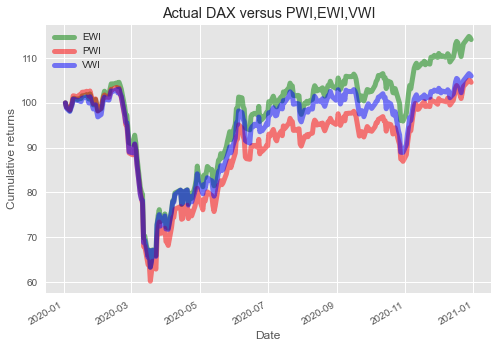

In [65]:
TS = EWI.join([PWI,VWI]).loc["2020":"2020-12-30"]
TS = TS/TS.iloc[0]*100

plt.style.use("ggplot")
fig = TS.plot(color=["Green","red","blue","yellow"],alpha=.5,linewidth=5)

plt.title("Actual DAX versus PWI,EWI,VWI")
plt.legend(loc="best")
plt.ylabel("Cumulative returns")
plt.show()

In [66]:
TS

#Return for msrp should look something like this

,EWI,PWI,VWI
Date,,,
2020-01-02,100.000000,100.000000,100.000000
2020-01-03,99.102777,99.047265,98.801375
2020-01-06,98.244035,98.426834,98.089414
2020-01-07,99.113591,99.247517,98.820519
2020-01-08,99.860118,100.070452,99.504692
...,...,...,...
2020-12-22,111.690868,102.212376,103.591739
2020-12-23,113.158694,103.644168,104.937053
2020-12-28,114.831399,105.045857,106.537949


In [68]:
from scipy.optimize import Bounds
import pandas_datareader as pdr
from numpy.linalg import inv
from scipy.optimize import minimize
import seaborn as sns
def pvar(W,S):
    return(W.T @ S @ W)

def pret(w, R):
    return (w @ R)

def sharpe(w,ER,S):
    return -(w.T@ER)/((w.T@S@w)**.5)

def msrp(ER,S):
    ONE = np.ones(len(S))

    return (inv(S) @ ER )/ (ONE.T @ inv(S)@ ER)

def sharpe(w, ER, S):
    return -(w @ ER)/np.sqrt(w @ S @ w)



def gmvp(S):
    ONE = np.ones(len(S))

    return (inv(S)@ONE)/ (ONE.T @ inv(S)@ONE)
def NMSRPnoSS(ER,S):
    
    cons= ({"type":"eq","fun":lambda x :np.sum(x)-1})
    bounds= Bounds(0,1)
    x0 = gmvp(S)
    return  minimize(sharpe,x0,method="SLSQP",args=(ER,S),constraints=cons,options={"disp":True,"ftol":1e-9},bounds=bounds)


def NGMVPnoSS(S):
    cons= ({"type":"eq","fun":lambda x :np.sum(x)-1})
    bounds= Bounds(0,1)
    x0 =  gmvp(S)
    return  minimize(pvar,x0,method="SLSQP",args=S,constraints=cons, options={"disp":True,"ftol": 1e-9},bounds=bounds)
    
    

In [69]:
df_ER = (dax.pct_change()*100).shift(1)
#df_ER.drop("ENR.DE",axis=1,inplace=True)
df_R = dax.pct_change()*100


In [70]:
df_ER

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.137206,-1.106094,-1.493635,-1.278558,-1.212612,-2.079036,-0.663830,-1.810898,0.254238,-1.320268,...,-1.426153,-2.499325,1.179243,-0.116253,-1.241055,-0.445095,-1.262300,-1.921778,-2.138501,0.371751
2020-01-07,-0.787808,-0.616295,-1.486555,-1.157353,-0.368247,-1.140553,-4.797145,-0.540050,-4.902794,-0.896553,...,-1.692000,-0.917438,1.072264,0.077590,0.038074,-1.453053,-0.747134,-0.464081,-0.011323,-0.308638
2020-01-08,1.760741,0.229670,0.045278,0.543629,1.601642,2.165423,0.601659,0.799106,-2.222222,3.465554,...,4.963831,0.925932,1.014765,1.666664,0.685191,2.268424,0.451655,0.638920,-0.317065,0.536631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,-1.204177,0.147967,0.519396,0.135042,1.695281,1.511722,0.603908,1.314178,-2.572099,0.369549,...,-0.683429,0.904288,0.135748,0.718821,0.020228,-1.007639,-3.352394,0.463918,-0.763953,-2.225419
2021-11-24,-2.545261,0.098496,1.647022,1.006225,-0.358722,-0.614300,-0.070623,-1.022315,-4.800000,2.908689,...,-3.720545,-1.132911,-2.666068,0.658804,0.889786,0.246767,-1.742563,-1.654696,-1.093379,-3.230542
2021-11-25,-1.269087,-0.073798,-1.683878,-2.495635,-2.064808,-1.929198,-2.473494,-1.854729,-0.588233,2.415022,...,-0.109030,-0.136814,0.139277,2.072532,1.643618,0.707691,-0.501923,-0.913000,-2.774957,5.013533


In [ ]:
W_size=60
AvgER_rolling = df_ER.rolling(W_size).mean()
CovER_rolling = df_ER.rolling(W_size).cov()

Backtest_R = pd.DataFrame(index=df_R.index,columns=["GMVP","MSRP","EW","NMSRPnoSS","NGMVPnoSS"])

for d in df_ER.index:
    ER = AvgER_rolling.loc[d]
    S = CovER_rolling.loc[d]
    R = df_R.loc[d]
    print(d)
    Backtest_R.loc[d,"GMVP"]= pret(gmvp(S),R)
    Backtest_R.loc[d,"MSRP"]= pret(msrp(ER,S),R)
   # Backtest_R.loc[d,"NGMVPnoSS"]= pret(NGMVPnoSS(S).x,R)
    Backtest_R.loc[d,"NMSRPnoSS"]= pret(NMSRPnoSS(ER,S).x,R)

Backtest_R.loc[:,"EW"] = df_R.mean(axis=1) 
Backtest_R = Backtest_R.iloc[( W_size):]

2020-01-02 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2020-01-03 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2020-01-06 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2020-01-07 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2020-01-08 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
        

In [ ]:
Backtest_R

In [ ]:
plt.style.use('seaborn')
CumRet = (1 + Backtest_R.divide(100)).cumprod()
#CumRet['GMVP'].plot(alpha=0.75, linestyle="--")
CumRet['MSRP'].plot(alpha=0.75, linestyle="-.")

plt.legend()
plt.title('Backtesting of optimal portfolios')
plt.show()

In [ ]:
Backtest_R.loc["2021-11":,"MSRP"]

In [ ]:
dax.loc["2021-09":,"ENR.DE"]

In [ ]:
Backtest_R.join(TS)